In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv('./Placement_Data_Full_Class.csv')

In [3]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# as salary and sl_no columns are not required for placement status prediction so we drop it
dataset.drop(['status','sl_no','specialisation','mba_p'], axis=1, inplace=True)

In [5]:
# missing values checking
dataset.isnull().sum()

gender       0
ssc_p        0
ssc_b        0
hsc_p        0
hsc_b        0
hsc_s        0
degree_p     0
degree_t     0
workex       0
etest_p      0
salary      67
dtype: int64

In [6]:
dataset['salary'].fillna(value=dataset['salary'].mean(), inplace=True)

In [7]:
dataset.isnull().sum()

gender      0
ssc_p       0
ssc_b       0
hsc_p       0
hsc_b       0
hsc_s       0
degree_p    0
degree_t    0
workex      0
etest_p     0
salary      0
dtype: int64

In [8]:
# checking column values data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  salary    215 non-null    float64
dtypes: float64(5), object(6)
memory usage: 18.6+ KB


# Label Encoding Data

In [9]:
# label encoding needs to be done to ensure all values in the dataset is numeric
# hsc_s, degree_t columns needs to be splitted into columns (get_dummies needs to be applied)
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(dataset[feature])
    dataset = pd.concat([dataset, dummy], axis=1)
    dataset.drop(feature, axis=1, inplace=True)

In [10]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,salary,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,270000.000000,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,200000.000000,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,250000.000000,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,288655.405405,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,425000.000000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,400000.000000,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,275000.000000,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,295000.000000,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,204000.000000,0,1,0,1,0,0


In [11]:
dataset.rename(columns={"Others": "Other_Degree"},inplace=True)

In [12]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,M,67.00,Others,91.00,Others,58.00,No,55.0,270000.000000,0,1,0,0,0,1
1,M,79.33,Central,78.33,Others,77.48,Yes,86.5,200000.000000,0,0,1,0,0,1
2,M,65.00,Central,68.00,Central,64.00,No,75.0,250000.000000,1,0,0,1,0,0
3,M,56.00,Central,52.00,Central,52.00,No,66.0,288655.405405,0,0,1,0,0,1
4,M,85.80,Central,73.60,Central,73.30,No,96.8,425000.000000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,77.60,No,91.0,400000.000000,0,1,0,1,0,0
211,M,58.00,Others,60.00,Others,72.00,No,74.0,275000.000000,0,0,1,0,0,1
212,M,67.00,Others,67.00,Others,73.00,Yes,59.0,295000.000000,0,1,0,1,0,0
213,F,74.00,Others,66.00,Others,58.00,No,70.0,204000.000000,0,1,0,1,0,0


In [13]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc.

In [14]:
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])


In [15]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,270000.000000,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,200000.000000,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,250000.000000,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,288655.405405,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,425000.000000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,400000.000000,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,275000.000000,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,295000.000000,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,204000.000000,0,1,0,1,0,0


In [16]:
dataset.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,288655.405405,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,77457.900102,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,200000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,250000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,288655.405405,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,288655.405405,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,940000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for Outliers

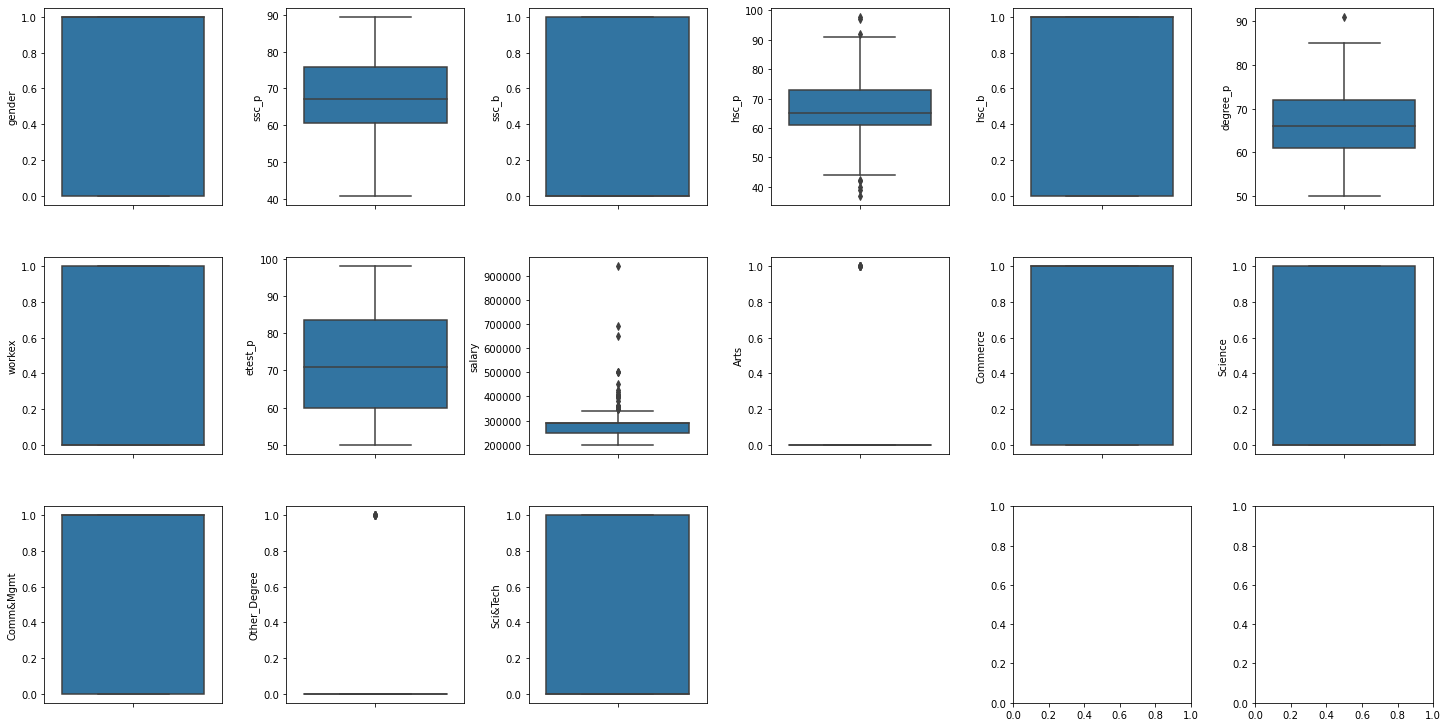

In [17]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) # for styling by giving padding

In [18]:
# deleting some outliers in 2 columns degree_p and hsc_p
dataset = dataset[~(dataset['degree_p']>=90)]
dataset = dataset[~(dataset['hsc_p']>=95)]

# Checking for Correlation

In [19]:
dataset.corr()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,salary,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
gender,1.000000,-0.059818,0.017052,-0.022187,0.074438,-0.154679,0.093325,0.081765,0.163765,-0.096386,0.001870,0.041426,-0.036801,-0.096386,0.086960
ssc_p,-0.059818,1.000000,0.107995,0.528111,0.056672,0.528753,0.183073,0.264009,0.011488,-0.194514,-0.093283,0.181772,-0.168282,-0.063459,0.208907
ssc_b,0.017052,0.107995,1.000000,-0.140332,0.608493,0.020828,-0.027916,-0.018739,0.023211,-0.001410,-0.042586,0.043708,-0.078842,-0.001410,0.083707
hsc_p,-0.022187,0.528111,-0.140332,1.000000,-0.038259,0.443595,0.135144,0.208809,-0.024155,-0.074931,0.267073,-0.236466,0.121441,-0.132137,-0.061747
hsc_b,0.074438,0.056672,0.608493,-0.038259,1.000000,0.043618,0.039061,0.031316,-0.027633,-0.114855,-0.069985,0.122407,-0.019492,-0.114855,0.077977
degree_p,-0.154679,0.528753,0.020828,0.443595,0.043618,1.000000,0.135100,0.226353,-0.059436,-0.153777,-0.005676,0.074850,-0.004369,-0.180476,0.094883
workex,0.093325,0.183073,-0.027916,0.135144,0.039061,0.135100,1.000000,0.052862,0.096220,0.054259,-0.070916,0.047346,-0.118781,0.009501,0.120296
etest_p,0.081765,0.264009,-0.018739,0.208809,0.031316,0.226353,0.052862,1.000000,0.123446,-0.073539,-0.023192,0.056508,-0.010486,0.009482,0.006296
salary,0.163765,0.011488,0.023211,-0.024155,-0.027633,-0.059436,0.096220,0.123446,1.000000,-0.063319,-0.031564,0.060383,-0.152489,-0.005874,0.163473
Arts,-0.096386,-0.194514,-0.001410,-0.074931,-0.114855,-0.153777,0.054259,-0.073539,-0.063319,1.000000,-0.247575,-0.198994,-0.021492,0.328810,-0.141863


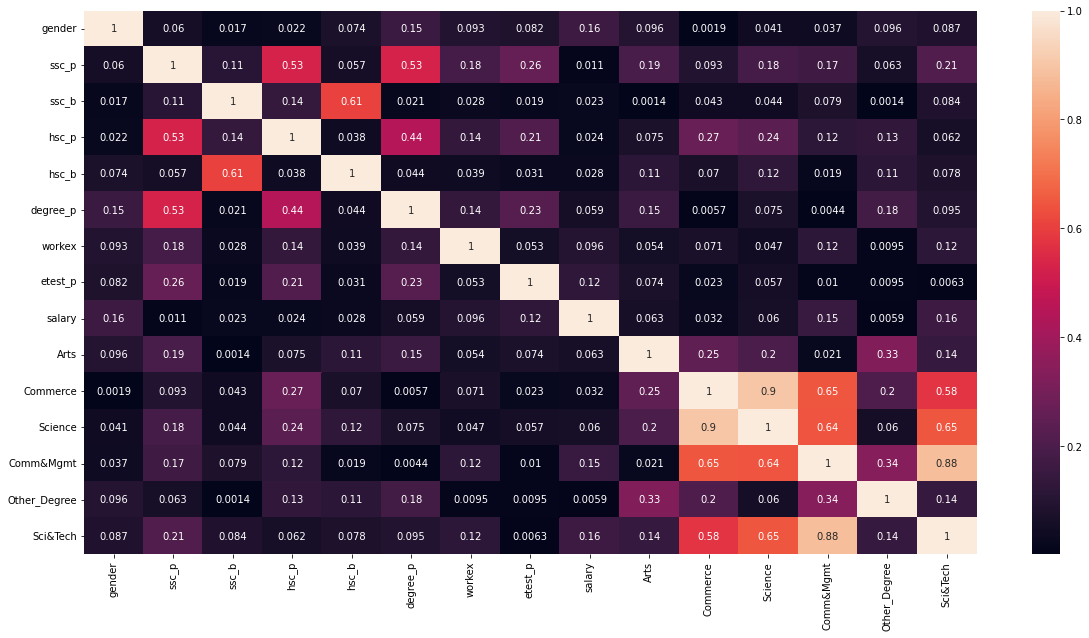

In [20]:
# heatmap for checking correlation or linearity

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)

Correlation between the features are atmost 0.9 so they are not multi-correlated

In [21]:
dataset.shape

(212, 15)

C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagas\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

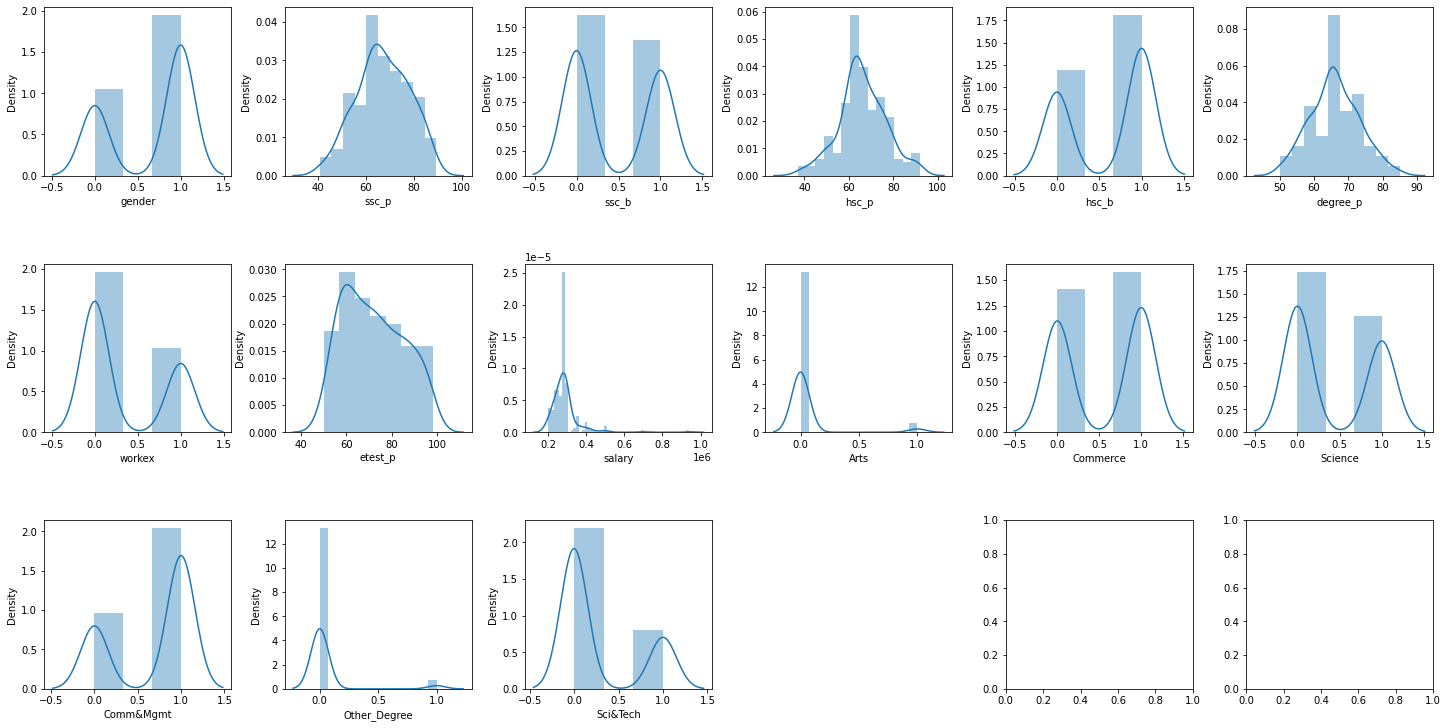

In [22]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [23]:
x = dataset.loc[:,dataset.columns!='salary'] # all features are used
y = dataset.loc[:, 'salary'] # label is status of placement

In [24]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.5,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.0,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.8,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,77.60,0,91.0,0,1,0,1,0,0
211,1,58.00,1,60.00,1,72.00,0,74.0,0,0,1,0,0,1
212,1,67.00,1,67.00,1,73.00,1,59.0,0,1,0,1,0,0
213,0,74.00,1,66.00,1,58.00,0,70.0,0,1,0,1,0,0


In [25]:
y

0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 212, dtype: float64

In [26]:
#sc= StandardScaler()
#x_scaled = sc.fit_transform(x) # for standardising the features
#x_scaled = pd.DataFrame(x_scaled)

In [27]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.18, random_state=0)

# Using Logistic Regression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = lr.predict(x_test)

In [31]:
y_pred

array([289744.99400852, 236454.7275779 , 280756.43244093, 324576.80702281,
       303882.62910749, 251508.22140279, 275874.46236424, 313970.27190638,
       305287.71350803, 280265.38883696, 291872.8050359 , 260382.71753053,
       272387.75222946, 270515.71546362, 254899.75413245, 294059.67498881,
       237399.83432874, 233507.62714834, 295495.74996926, 315327.05275445,
       303970.37126512, 269434.1317385 , 310430.77003409, 279143.4243083 ,
       267250.2186877 , 271094.12123059, 278496.02720358, 282395.99904929,
       298033.35897962, 288343.60491358, 308232.23839801, 275564.72975923,
       279544.2737857 , 270591.47309832, 294908.73788206, 286315.28231524,
       293956.14048882, 337018.87123979, 298030.85975598])

In [32]:
print(type(x_test))
#print(x_test.iloc[11])
print(x_test.iloc[12])
print(y_pred[12])


print(x_test.iloc[15])
print(y_pred[15])

<class 'pandas.core.frame.DataFrame'>
gender           1.0
ssc_p           52.0
ssc_b            0.0
hsc_p           49.0
hsc_b            1.0
degree_p        58.0
workex           0.0
etest_p         62.0
Arts             0.0
Commerce         1.0
Science          0.0
Comm&Mgmt        1.0
Other_Degree     0.0
Sci&Tech         0.0
Name: 159, dtype: float64
272387.7522294597
gender           1.00
ssc_p           55.68
ssc_b            1.00
hsc_p           61.33
hsc_b            1.00
degree_p        56.87
workex           0.00
etest_p         66.00
Arts             0.00
Commerce         1.00
Science          0.00
Comm&Mgmt        1.00
Other_Degree     0.00
Sci&Tech         0.00
Name: 203, dtype: float64
294059.674988811


In [33]:
y_test

209    216000.000000
38     240000.000000
90     300000.000000
192    270000.000000
150    690000.000000
76     230000.000000
97     288655.405405
138    250000.000000
5      288655.405405
84     300000.000000
56     240000.000000
144    288655.405405
159    288655.405405
113    280000.000000
75     288655.405405
203    260000.000000
127    250000.000000
12     288655.405405
169    288655.405405
157    300000.000000
167    288655.405405
201    288655.405405
211    275000.000000
189    288655.405405
184    288655.405405
18     288655.405405
214    288655.405405
15     200000.000000
87     288655.405405
72     240000.000000
7      252000.000000
64     240000.000000
142    260000.000000
98     220000.000000
137    225000.000000
161    288655.405405
34     288655.405405
153    340000.000000
91     288655.405405
Name: salary, dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

5059395558.603057

In [35]:
lr.score(x_train,y_train)

0.0895874716877223

In [36]:
import pickle
pickle.dump(lr,open("linear_model.pkl",'wb'))

# Using SVM Linear Kernel

In [37]:
clf = SVR()

In [38]:
clf.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred_svm = clf.predict(x_test)

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

5059395558.603057

In [41]:
import pickle
pickle.dump(clf,open("svr_model.pkl",'wb'))

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()  
knn .fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

5868547117.398063

In [43]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg

In [44]:
xgb = xg.XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
mean_squared_error(y_test, y_pred)

5729006165.86668

In [45]:
rclf = RandomForestRegressor()  
rclf.fit(x_train, y_train)
y_pred = rclf.predict(x_test)
mean_squared_error(y_test, y_pred)

5285664400.186945

In [46]:
import pickle
pickle.dump(rclf,open("rfreg_model.pkl",'wb'))